# Lab 02 - 15 paź 2023

In [12]:
# imports
import numpy as np
import pandas as pd
import random
import math
import pygad
import time

## Problem podziału (przypomnienie z wykładu)

W problemie podziału (Parition problem) pytamy, czy da się podzielić zbiór liczb S na dwa zbiory S1 i S2 w taki sposób, że liczby w jednym i drugim podzbiorze sumują się do tej samej liczby. 
Rozpatrzmy poniższy zbiór o 15 liczbach: S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]

## Zadanie wstępne

Przedstawiony powyżej problem podziału został rozwiązany za pomocą paczki pygad (co
omówiono na wykładzie) https://pygad.readthedocs.io/en/latest/
Uruchom i przeanalizuj poniższe rozwiązanie (załączone jest też jako osobny plik
partition_ga.py)

Parameters of the best solution: [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
Fitness value of the best solution = -0.0
Predicted output based on the best solution: 252.0


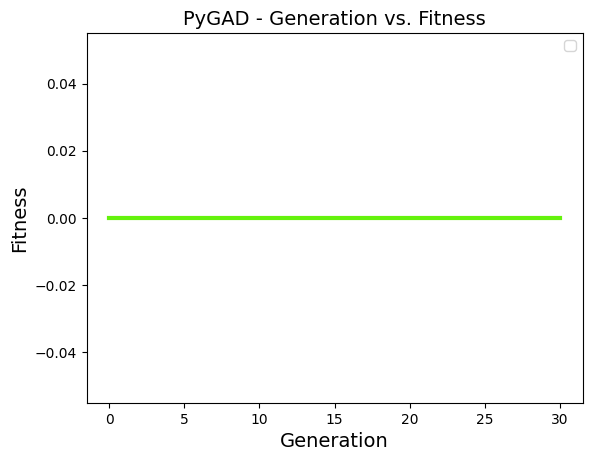

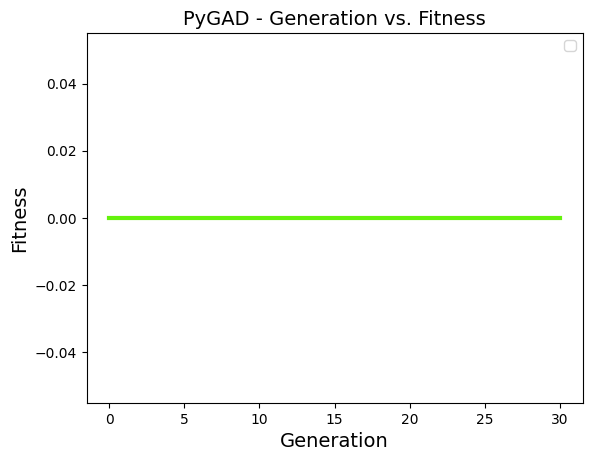

In [13]:
S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]
# definiujemy parametry chromosomu
# geny to liczby: 0 lub 1
gene_space = [0, 1]


# definiujemy funkcję fitness
def fitness_func(ga_instance, solution, solution_idx):
    sum1 = np.sum(solution * S)
    solution_invert = 1 - solution
    sum2 = np.sum(solution_invert * S)
    fitness = -np.abs(sum1 - sum2)
    # lub: fitness = 1.0 / (1.0 + numpy.abs(sum1-sum2))
    return fitness


fitness_function = fitness_func
# ile chromsomów w populacji
# ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)
# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2
# jaki typ selekcji rodzicow?
# sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"
# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8
# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
)
# uruchomienie algorytmu
ga_instance.run()
# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution: {solution}".format(solution=solution))
print(
    "Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness
    )
)
# tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = np.sum(S * solution)
print(
    "Predicted output based on the best solution: {prediction}".format(
        prediction=prediction
    )
)
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

## Problem plecakowy (przypomnienie z wykładu)

W problemie plecakowym dana jest lista przedmiotów o wartościach i wagach. Chcemy do
plecaka zabrać najcenniejsze rzeczy. Pytanie brzmi: jaki zestaw przedmiotów (o łącznej
maksymalnej wadze n kg) ma największą wartość?

## Zadanie 1

Rozwiąż powyższy problem plecakowy w Pythonie z użyciem paczki pygad. Możesz skorzystać
z kodu z partition_ga.py, który trzeba rozsądnie zmodyfikować. Najważniejsze jest poprawne
napisanie funkcji fitness – wskazówki były na wykładzie.
Dopasuj parametry algorytmu do powyższego problemu (wielkość populacji, mutacja, itp.)
Jakie jest najlepsze rozwiązanie? Które przedmioty powinniśmy zabrać? Jaką mają wartość?

In [14]:
item_number = np.arange(1, 12)
weights = np.array([7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15])
values = np.array([100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300])

knapsack_max_weight = 25

for i in range(item_number.shape[0]):
    print(
        "Przedmiot ", item_number[i], ": Waga = ", weights[i], ", Wartość = ", values[i]
    )

Przedmiot  1 : Waga =  7 , Wartość =  100
Przedmiot  2 : Waga =  7 , Wartość =  300
Przedmiot  3 : Waga =  6 , Wartość =  200
Przedmiot  4 : Waga =  2 , Wartość =  40
Przedmiot  5 : Waga =  5 , Wartość =  500
Przedmiot  6 : Waga =  6 , Wartość =  70
Przedmiot  7 : Waga =  1 , Wartość =  100
Przedmiot  8 : Waga =  3 , Wartość =  250
Przedmiot  9 : Waga =  10 , Wartość =  300
Przedmiot  10 : Waga =  3 , Wartość =  280
Przedmiot  11 : Waga =  15 , Wartość =  300


In [15]:
def fitness_func(ga_instance, solution, solution_idx):
    weight_sum = np.sum(solution * weights)
    value_sum = np.sum(solution * values)
    if weight_sum <= knapsack_max_weight:
        fitness = value_sum
    else:
        fitness = 0
    return fitness

In [16]:
ga_instance = pygad.GA(
    gene_type=int,
    gene_space=[0, 1],
    num_generations=100,
    num_parents_mating=4,
    fitness_func=fitness_func,
    keep_parents=2,
    sol_per_pop=10,
    num_genes=len(item_number),
    mutation_percent_genes=2,
    mutation_type="random",
    parent_selection_type="sss",
)

Najlepsze rozwiązanie:  (array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]), 1630, 0)
Wybrany przedmiot # 1
Wybrany przedmiot # 2
Wybrany przedmiot # 4
Wybrany przedmiot # 6
Wybrany przedmiot # 7
Wybrany przedmiot # 9
Całkowita wartość przedmiotów:  1630


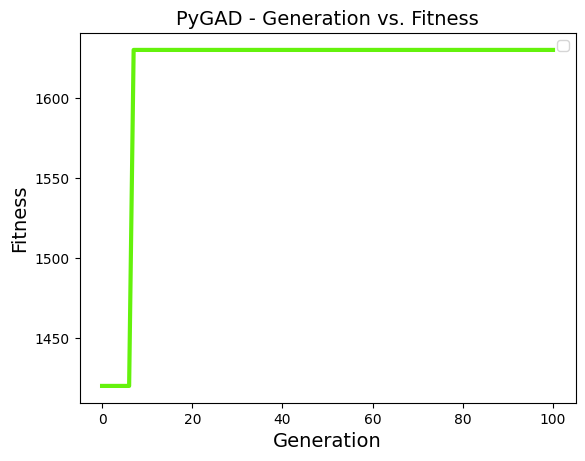

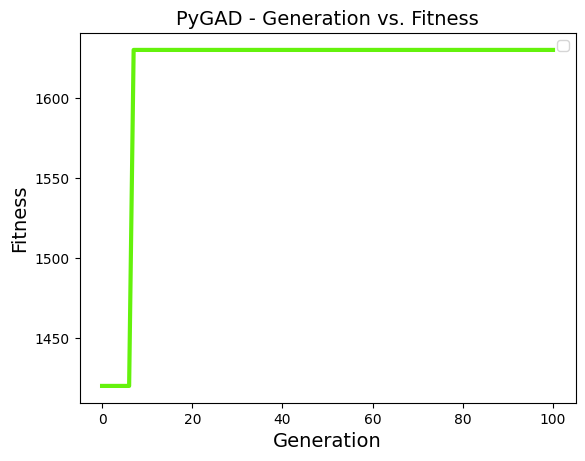

In [17]:
ga_instance.run()
print("Najlepsze rozwiązanie: ", ga_instance.best_solution())
# Items to pick
for selected_item in range(len(item_number)):
    if ga_instance.best_solution()[0][selected_item] == 1:
        print("Wybrany przedmiot #", selected_item)
# Total value
print("Całkowita wartość przedmiotów: ", ga_instance.best_solution()[1])
ga_instance.plot_fitness()

## Zadanie 2

Zapoznaj się z możliwością dodania warunków zatrzymania dla algorytmu genetycznego w
pygad:
https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#stop-criteria
Dla zadania 1, zmodyfikuj kod programu tak, aby:
a) Program tworzył nowe pokolenia dopóki nie znajdzie rozwiązania z fitness równym
1600. Gdy fitness 1600 zostanie osiągnięte, to algorytm przerwie działanie.
b) Po zakończeniu program wypisze, ile pokoleń minęło, aż do znalezienia najlepszego
rozwiązania.
c) Zmierz, ile czasu działał algorytm genetyczny. Przed i po poleceniach:
ga_instance = pygad.GA(...)
ga_instance.run()
trzeba zmierzyć czas systemowy i podać różnicę czasu.
Przykład z Internetu:
import time
start = time.time()
print("hello")
end = time.time()
print(end - start)
d) Zmierz czas 10 razy, zapisz wszystkie wyniki i podaj średnią z wyników. Ile średnio
czasu zajmuje algorytmowi genetycznemu znalezienie rozwiązania?

Czas:  0.002997159957885742
Rozwiązanie optymalne:  (array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]), 1630, 3)
Generacja = 7


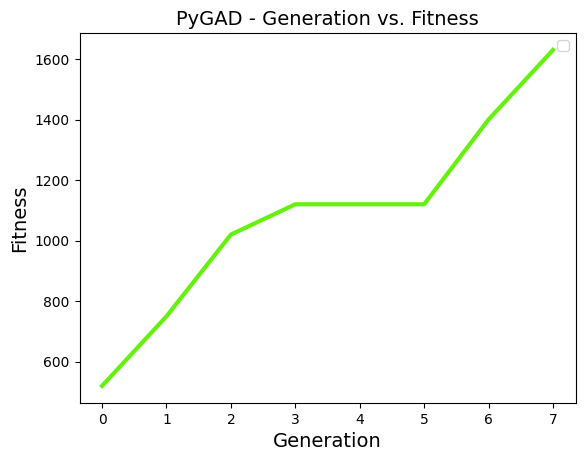

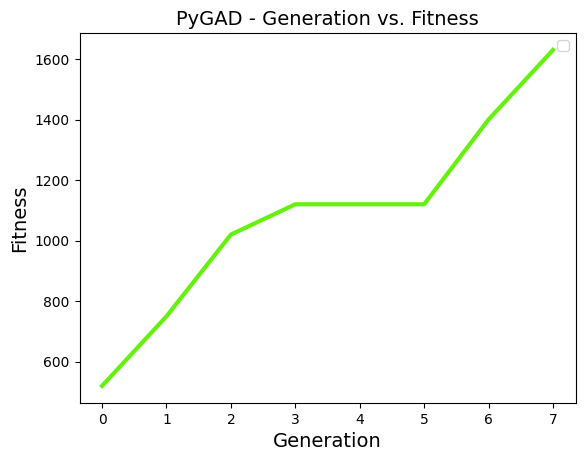

In [18]:
start_time = time.time()
ga_instance = pygad.GA(
    gene_type=int,
    gene_space=[0, 1],
    num_generations=999,
    num_parents_mating=4,
    fitness_func=fitness_func,
    keep_parents=2,
    sol_per_pop=10,
    stop_criteria="reach_1600",
    num_genes=len(item_number),
    mutation_percent_genes=2,
)

ga_instance.run()
end_time = time.time()

print("Czas: ", end_time - start_time)
print("Rozwiązanie optymalne: ", ga_instance.best_solution())
print("Generacja = {generation}".format(generation=ga_instance.generations_completed))
ga_instance.plot_fitness()

## Problem inżynieryjny: stop metali

W pewnym zakładzie badawczym inżynierowie próbowali stworzyć bardzo trwały stop sześciu
metali. Ilości wszystkich 6 metali w stopie oznaczone zostały symbolami x, y, z, u, v, w i są to
liczby z przedziału [0, 1). Okazało się, że wytrzymałość stopu określona jest przez funkcję:
endurance(x, y, z, v, u, w) = e^−2∙(y−sin (x))^2+ sin(z ∙ u) + cos (v ∙ w)
Obliczenie maksymalnej wytrzymałości (endurance) było dla inżynierów problematyczne.
Poproszono Ciebie, eksperta od sztucznej inteligencji, o rozwiązanie problemu.

## Zadanie 3

W tym zadaniu rozwiążemy problem inżynieryjny za pomocą algorytmu genetycznego.
Naszym celem jest znalezienie odpowiedzi na dwa pytania:
• Jaka jest najlepsza wytrzymałość stopu metali?
• Jakie ilości metali trzeba zmieszać, by uzyskać najbardziej wytrzymały stop?

Przydatny fragment kodu (po imporcie biblioteki math):
def endurance(x, y, z, u, v, w):
return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

Zadanie to jest inne niż te z poprzednich laboratoriów, gdyż musimy się zmierzyć z
chromosomami, które nie mają zer i jedynek jak genów. Zamiast nich, mają liczby rzeczywiste
(zmiennoprzecinkowe) z przedziału [0, 1).

Przykładowy chromosom: A = [0.09, 0.06, 0.99, 0.98, 0.1, 0.15]

Rozwiąż ten problem z użyciem paczki pygad i odpowiedz na pytania zadane na początku tego
zadania.
a) Otwórz dokumentację i korzystaj z niej w razie problemów:
https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html
b) Zdefiniuj poprawnie gene_space.
c) Zdefiniuj sensowną funkcję fitness (to jest u nas banalnie proste 😉)
d) Ustaw sensowne parametry związane z populacją i długością chromosomu (6!).
e) Chromosom jest krótki, mutację trzeba zwiększyć do kilkunastu procent, żeby nie
dostawać czerwonego warninga.
UserWarning: The percentage of genes to mutate ...
f) Uruchom algorytm genetyczny. Powtórz kilka razy, by zobaczyć czy wyniki i wykresy się
zmieniają.

Parameters of the best solution: [ 0.29319985  0.28267742  1.60026102  0.97454955  0.01627348 -1.40553626]
Fitness value of the best solution = 2.999594624870235


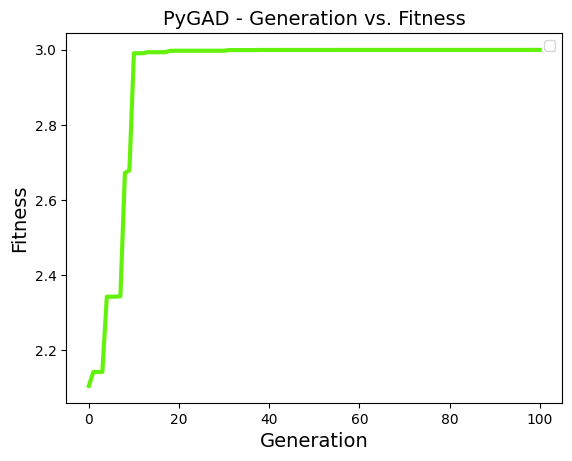

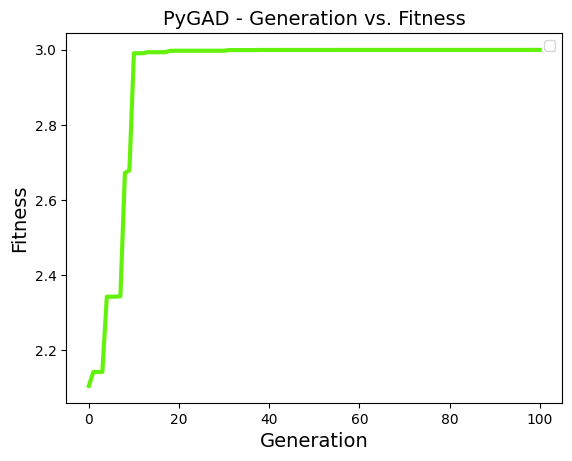

In [23]:
def endurance(x, y, z, u, v, w):
    return math.exp(-2 * (y - math.sin(x)) ** 2) + math.sin(z * u) + math.cos(v * w)